In [2]:
import pandas as pd
import os, re 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# from sklearn.decomposition import PCA
# from numpy.linalg import svd 

# from scipy.spatial import distance_matrix
# from skbio.stats import distance as sk_distance 

#Custom scripts for standardized data loading#
import importlib
from GL_utils import data_loading as GL_load
importlib.reload(GL_load)

import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 

csv_dir = "csv"

In [38]:
##input file loading##
#Directory paths
SVD_parent_dir = "/Users/evanlee/MSTP/Gordon/experiments/MG00_HWDC_og/HOSVD"
formatted_SVD_input_dir = "{0}/formatted_input".format(SVD_parent_dir)
cecal_abundance_dir = "{0}/formatted_output/4th_trial/full/cecal_abundance".format(SVD_parent_dir)
third_trial_full_counts_dir = "{0}/formatted_output/2nd3rd_trial/full".format(SVD_parent_dir)
figures_dir = "{0}/figures/prevotella_cazymes".format(SVD_parent_dir)
os.makedirs(figures_dir,exist_ok=True)


DROP_LTS = ["ROSSTS7063_a2"]
# COL_FILTER_PATS = ["cecal","1C|1B"] #Include both 1B and 1C 
COL_FILTER_PATS = ["cecal","1C"]

for path in [SVD_parent_dir,formatted_SVD_input_dir,cecal_abundance_dir,
            third_trial_full_counts_dir]:
    assert(os.path.exists(path))
#cecal abundance - E6 normalized#
cecal_abundance_fpath = "{0}/cecal_abundance_E6.csv".format(cecal_abundance_dir)
cecal_abundance = pd.read_csv(cecal_abundance_fpath,index_col=0)

#third trial kallisto pseudocounts and tpm#
#To deprecate#

#Load datasets with 1B and 1C data (all_arms_full_merged_X)
third_trial_counts_fpath = "{0}/all_arms_full_merged_count.csv".format(third_trial_full_counts_dir)
third_trial_counts = GL_load.load_kallisto_pseudocounts(third_trial_counts_fpath,
                                                        col_filtering_pats=COL_FILTER_PATS,
                                                        dropped_locus_tags=DROP_LTS)
third_trial_tpm_fpath ="{0}/all_arms_full_merged_tpm.csv".format(third_trial_full_counts_dir)
third_trial_tpm = GL_load.load_kallisto_pseudocounts(third_trial_tpm_fpath,
                                                        col_filtering_pats=COL_FILTER_PATS,
                                                        dropped_locus_tags=DROP_LTS)


#mcSEED#
mcseed_fpath = "{0}/19isolates_mcseed_pathwaycomplete.csv".format(formatted_SVD_input_dir)
mcseed_df, pht_pathway_df = GL_load.load_mcSEED(mcseed_fpath,list_cols=False)
# display(mcseed_df)
# print("Full mcSEED isolate names: ",GL_load.MCSEED_ISOLATE_NAMES)
# print("mcSEED taxa names: ",GL_load.MCSEED_TAXA_NAMES)

#CAZyme annotations# 
cazyme_fpath = "{0}/CAZyme_annotation_summary.txt".format(formatted_SVD_input_dir)
cazyme = GL_load.load_CAZyme(cazyme_fpath)

pco_pul_loci_fpath = "{0}/formatted_input/Pcopri_PUL_loci.csv".format(SVD_parent_dir)
pco_pul_loci = pd.read_csv(pco_pul_loci_fpath)
pco_pul_loci.columns = [col.strip() for col in pco_pul_loci.columns]

pst_pul_loci_fpath = "{0}/formatted_input/Pstercorea_PUL_loci.csv".format(SVD_parent_dir)
pst_pul_loci = pd.read_csv(pst_pul_loci_fpath)
pst_pul_loci.columns = [col.strip() for col in pst_pul_loci.columns]
pst_pul_loci.loc[:,"Predicted PUL target(s)"] = pst_pul_loci.loc[:,"Predicted PUL target(s)"].replace(np.nan,"")

In [39]:
# display(third_trial_counts)
# display(cecal_abundance)
display(pst_pul_loci)

,PUL,Predicted PUL target(s),Gene locus tag,GH Family / Gene annotation*
0,PUL 1,no CAZyme,NBCBLOMG_00081,SusC
1,PUL 1,no CAZyme,NBCBLOMG_00082,SusD
2,PUL 2,,NBCBLOMG_00122,SusD
3,PUL 2,,NBCBLOMG_00123,SusC
4,PUL 2,,NBCBLOMG_00124,unk
5,PUL 2,,NBCBLOMG_00125,CBM51|CBM51|GH27
6,PUL 3,,NBCBLOMG_00385,GH63
7,PUL 3,,NBCBLOMG_00386,unk
8,PUL 3,,NBCBLOMG_00387,unk
9,PUL 3,,NBCBLOMG_00388,unk


In [40]:
# prevotella_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pco","Pst"]),"Locus tag"]
# pco_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pco"]),"Locus tag"]
# pst_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pst"]),"Locus tag"]

# pco_pull_loci_tags = pco_pul_loci["Gene locus tag"]

# prevotella_pul_caz_loci = pd.concat((prevotella_cazyme_loci,pco_pull_loci_tags)).unique()
# pco_pul_caz_loci =  pd.concat((pco_cazyme_loci,pco_pull_loci_tags)).unique()
# # display(pst_cazyme_loci)
# # print(len(pco_pul_caz_loci))

In [41]:
axag_pattern = "arabinoxylan|arabinogalactan"
ag_pattern = "arabinogalactan"
ax_pattern = "arabinoxylan"
pco_axag_loci = pco_pul_loci.loc[pco_pul_loci["Predicted PUL target(s)"].str.contains(axag_pattern)]
pst_axag_loci = pst_pul_loci.loc[pst_pul_loci["Predicted PUL target(s)"].str.contains(axag_pattern)]
axag_loci_list = pco_axag_loci["Gene locus tag"].tolist() + pst_axag_loci["Gene locus tag"].tolist()


pco_ag_loci = pco_pul_loci.loc[pco_pul_loci["Predicted PUL target(s)"].str.contains(ag_pattern)]
pst_ag_loci = pst_pul_loci.loc[pst_pul_loci["Predicted PUL target(s)"].str.contains(ag_pattern)]

pco_ax_loci = pco_pul_loci.loc[pco_pul_loci["Predicted PUL target(s)"].str.contains(ax_pattern)]
pst_ax_loci = pst_pul_loci.loc[pst_pul_loci["Predicted PUL target(s)"].str.contains(ax_pattern)]

ag_loci_list = pco_ag_loci["Gene locus tag"].tolist() + pst_ag_loci["Gene locus tag"].tolist()
ax_loci_list = pco_ax_loci["Gene locus tag"].tolist() + pst_ax_loci["Gene locus tag"].tolist()

print(ag_loci_list)
# print(ax_loci_list)
# print(len(pco_pul_loci))
# print(len(pco_caz))
# with(pd.option_context('display.max_rows',None)):
#     display(pco_caz)
# display(axag_loci_list)

# display(third_trial_tpm.loc[ag_loci_list,:])

['NJCFFJJN_03238', 'NJCFFJJN_03239', 'NJCFFJJN_03240', 'NJCFFJJN_03241', 'NJCFFJJN_03242', 'NJCFFJJN_03243', 'NJCFFJJN_03244', 'NJCFFJJN_03245']


In [42]:
#Testing vc_strain_locus_tag 

locus_vc_df = GL_load.vc_strain_locus_tag(third_trial_counts,mcseed_df,drop_loci_tags=["ROSSTS7063_a2"])
# display(locus_vc_df)
def expression_long_df(counts_df,locus_vc_df,counts_filterings_pats=[],
                       locus_average=False,flagged_loci=[]):
    SAMPLE_METADATA_PAT = "[\w+_]\-([a-z]+)_[\w_]+_([1-2][A-C])_Pup_(\w+)"
    SAMPLE_METADATA_COLUMNS = ["Tissue","Arm","Pup"]
    
    sample_metadata = counts_df.columns.str.extract(SAMPLE_METADATA_PAT,expand=True)\
                                .rename(columns=dict(zip(range(3),SAMPLE_METADATA_COLUMNS)))
    long_cols = ["Locus","Strain","Sample","Expression"]+SAMPLE_METADATA_COLUMNS
    if len(flagged_loci)>0:
        long_cols.append("Locus Flag")
    long_df = pd.DataFrame(columns=long_cols)
    unique_lts = counts_df.index.str.extract(r'(\w+)_\d+',expand=False).unique()
    if len(counts_filterings_pats) > 0:
        for filt_pat in counts_filterings_pats:
            counts_df = counts_df.loc[:,counts_df.columns.str.contains(filt_pat)]
    #locus averaging within each arm - replaces columns with "{Tissue}_{Arm}_mean" with one per arm representing
    #average of expression data in counts; note that if applying log2 transform, this should be done upstream of 
    #calling expression_lojng_df with locus_average=True. 
    if locus_average: 
        averaged_counts = pd.DataFrame(index=counts_df.index)
        #For each unique arm in sample_metadata, select arm_counts to correspond to columns matching arm 
        for arm in sample_metadata["Arm"].unique():
            arm_metadata = sample_metadata.loc[sample_metadata["Arm"]==arm]
            arm_counts = counts_df.loc[:,counts_df.columns.str.contains(arm)]
            #Generate new sample name of form "{Tissue}_{Arm}_mean" which will be the new column name in counts_df
            mean_sample_name = "_".join([arm_metadata.iloc[0][field] for field in ["Tissue","Arm"]])+"_mean"
            #Average across samples in this arm
            arm_counts_mean = arm_counts.mean(axis=1).rename(mean_sample_name) 
            averaged_counts.loc[:,mean_sample_name] = arm_counts_mean
        counts_df = averaged_counts #replace counts_df with new averaged counts 
        sample_metadata_pat = "(\w+)_([1-2][A-C])_(mean)" #use revised sample_metadata_pat to match new column names
    else: 
        sample_metadata_pat = SAMPLE_METADATA_PAT #default column names sample_metadata_pat 
    #TODO: document this section 
    for lt in unique_lts:
        strain = locus_vc_df.loc[lt,"Strain"]
        lt_counts = counts_df.loc[counts_df.index.str.contains(lt)].reset_index()
        short_df = lt_counts.melt(id_vars=("target_id"),value_vars=lt_counts.columns,
                                 var_name="Sample",value_name="Expression")\
                            .rename(columns={"target_id":"Locus"})
        metadata_cols = ["Tissue","Arm","Pup"]
        sample_metadata = short_df["Sample"].str.extract(sample_metadata_pat)
        sample_metadata.rename(columns=dict(zip(range(3),metadata_cols)),inplace=True)
        short_df.loc[:,metadata_cols] = sample_metadata
        short_df.loc[:,"Strain"] = [strain]*len(short_df)
        
        if len(flagged_loci) > 0:# and sum(short_df["Locus"].isin(flagged_loci)) > 0: 
            short_df.loc[:,"Locus Flag"] = short_df.loc[:,"Locus"].isin(flagged_loci)
        
        long_df = pd.concat([long_df,short_df],ignore_index=True)
    long_df.loc[:,"Expression"] = long_df.loc[:,"Expression"].astype(float)
    return long_df

def log2_counts_df(counts_df,pseudocount=0.5,long_form=True,long_form_col="Expression"):
    """log2 transform a counts_df of either wide or long form. 
    
    Can specify pseudocount value to use as well as long_form=True/False."""
    log2_counts = counts_df.copy()
    if long_form: 
        log2_counts.loc[:,long_form_col] = np.log2(log2_counts.loc[:,long_form_col]+pseudocount)
    else: 
        log2_counts = np.log2(log2_counts+pseudocount)
    return log2_counts

filtering_pats = ["cecal","1C"]
third_trial_long_df = expression_long_df(third_trial_counts,locus_vc_df,
                                  counts_filterings_pats=filtering_pats)


In [45]:
def expression_distribution_comparison_2_strains(strain1_expr,strain2_expr,locus_vc_df,plot_fpath="",
                                                 locus_average=True,
                                                 log2_transform=True,flagged_loci=[],filtering_pats=[],
                                                 abundances=[],sham_record_vals=[],plot_title=""):
    violin_palette_2hue = ["#0072B2","#56B4E9"]
    point_palette_2hue = ["#00456E","#3A789C"]
    LT_PATTERN = r'(\w+)_\d+'
    
    #extract locus_tag string and strain name from strain1_expr and strain2_expr
    strain1_lt = strain1_expr.index.str.extract(LT_PATTERN,expand=False)[0]
    strain2_lt = strain2_expr.index.str.extract(LT_PATTERN,expand=False)[0]
    strain1 = locus_vc_df.loc[strain1_lt,"Strain"]
    strain2 = locus_vc_df.loc[strain2_lt,"Strain"]
    
    if len(abundances) >0: #abundance normalize 
        strain1_abundance = abundances.loc[strain1_expr.columns,strain1]
        strain2_abundance = abundances.loc[strain2_expr.columns,strain2]
        strain1_expr = strain1_expr/strain1_abundance
        strain2_expr = strain2_expr/strain2_abundance
    if log2_transform: #log2 transform data 
        strain1_expr = log2_counts_df(strain1_expr,long_form=False)
        strain2_expr = log2_counts_df(strain2_expr,long_form=False)
    
    #Generate long_df forms of strain1 and strain2 expression, including "Locus Flag" for flagged_loci and 
    # averaging across samples per arm for each locus (locus_average=True)
    strain1_long = expression_long_df(strain1_expr,locus_vc_df,filtering_pats,locus_average,flagged_loci=flagged_loci)
    strain2_long = expression_long_df(strain2_expr,locus_vc_df,filtering_pats,locus_average,flagged_loci=flagged_loci)
    combined_long = pd.concat((strain1_long,strain2_long),ignore_index=True)
    combined_long_flagged = combined_long.loc[combined_long["Locus Flag"]]
    
    #Provide sham record vals (in the case that there are no flagged loci for one of the strains) 
    #Otherwise swarm plot points will not be positioned by strain 
    if len(sham_record_vals) > 0: 
        sham_record_df = pd.DataFrame(index=[len(combined_long)],columns=combined_long.columns,
                                      data=dict(zip(combined_long.columns,sham_record_vals)))
        combined_long_flagged = pd.concat((combined_long_flagged,sham_record_df))
    
    #Violin and swarmplot calls 
    if len(combined_long["Arm"].unique()) <= 1:
        fig, ax = plt.subplots(1,1,figsize=(2,6))
    else:
        n_arms = len(combined_long["Arm"].unique())
        fig, ax = plt.subplots(1,1,figsize=(n_arms*1.5,6))
    sns.violinplot(data=combined_long,x="Arm",y="Expression",hue="Strain",scale="count",
                   split=True,palette=violin_palette_2hue)
    sns.swarmplot(data=combined_long_flagged,x="Arm",y="Expression",hue="Strain",
                  dodge=True,palette=point_palette_2hue)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
    ax.set_ylabel("log2 Expression")
    if plot_title:
        ax.set_title(plot_title)
    plt.savefig(plot_fpath,dpi=300,facecolor="w",bbox_inches="tight")
    



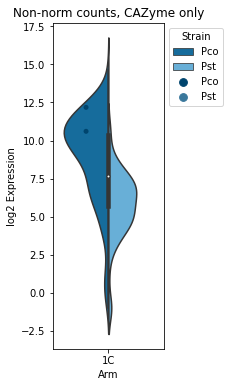

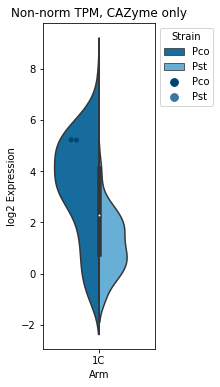

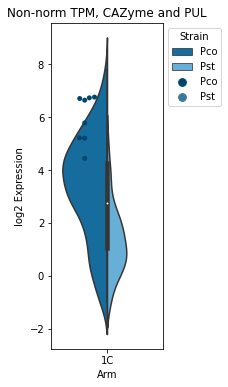

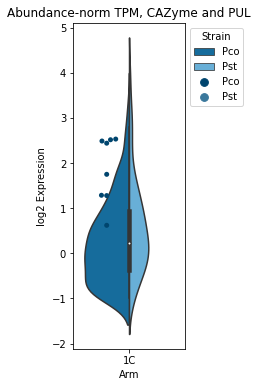

In [46]:
#Pst sham record to add to flagged loci 
sham_record_vals = ["NBCBLOMG_XXX","Pst",None,None,None,None,np.nan,True]    

#Subsets of counts/tpm - cazyme only 
prevotella_caz = cazyme.loc[cazyme["Strain"].isin(["Pco","Pst"]),"Locus tag"]
pco_caz = cazyme.loc[cazyme["Strain"].isin(["Pco"]),"Locus tag"]
pst_caz = cazyme.loc[cazyme["Strain"].isin(["Pst"]),"Locus tag"]
expr_prevotella_cazyme = prevotella_caz[prevotella_caz.isin(third_trial_counts.index)]
expr_pco_caz, expr_pst_caz = pco_caz[pco_caz.isin(third_trial_counts.index)],\
                                pst_caz[pst_caz.isin(third_trial_counts.index)]
pco_caz_counts, pst_caz_counts = third_trial_counts.loc[expr_pco_caz],third_trial_counts.loc[expr_pst_caz]
pco_caz_tpm, pst_caz_tpm = third_trial_tpm.loc[expr_pco_caz],third_trial_tpm.loc[expr_pst_caz]
#Subsets of counts/tpm - cazyme/PUL combined only 
prevotella_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pco","Pst"]),"Locus tag"]
pco_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pco"]),"Locus tag"]
pst_cazyme_loci = cazyme.loc[cazyme["Strain"].isin(["Pst"]),"Locus tag"]

pco_pull_loci_tags = pco_pul_loci["Gene locus tag"]
pst_pull_loci_tags = pst_pul_loci["Gene locus tag"]

# prevotella_pul_caz_loci = pd.concat((prevotella_cazyme_loci,pco_pull_loci_tags)).unique()
prevotella_pul_caz_loci = pd.concat((prevotella_cazyme_loci,
                                     pco_pull_loci_tags,
                                     pst_pull_loci_tags)).unique()
pco_pul_caz_loci =  pd.concat((pco_cazyme_loci,pco_pull_loci_tags)).unique()
pst_pul_caz_loci =  pd.concat((pst_cazyme_loci,pst_pull_loci_tags)).unique()

##Just CAZyme expression, counts##
plot_title = "Non-norm counts, CAZyme only"
plot_fpath = "{0}/non_norm_violin_cazyme_only_counts.pdf".format(figures_dir)
expression_distribution_comparison_2_strains(pco_caz_counts,pst_caz_counts,locus_vc_df,plot_fpath=plot_fpath,
                                             flagged_loci=ag_loci_list,sham_record_vals=sham_record_vals,
                                            locus_average=True,plot_title=plot_title)
plot_title = "Non-norm TPM, CAZyme only"
plot_fpath = "{0}/non_norm_violin_cazyme_only_tpm.pdf".format(figures_dir)
expression_distribution_comparison_2_strains(pco_caz_tpm,pst_caz_tpm,locus_vc_df,plot_fpath=plot_fpath,
                                             flagged_loci=ag_loci_list,sham_record_vals=sham_record_vals,
                                            locus_average=True,plot_title=plot_title)

##Cazyme and PUL expression, tpm##
expr_pco_caz_pul = [lt for lt in pco_pul_caz_loci if lt in third_trial_tpm.index]
expr_pst_caz_pul = [lt for lt in pst_pul_caz_loci if lt in third_trial_tpm.index]
pco_caz_pul_tpm =  third_trial_tpm.loc[expr_pco_caz_pul]
pst_caz_pul_tpm = third_trial_tpm.loc[expr_pst_caz_pul]

plot_title = "Non-norm TPM, CAZyme and PUL"
plot_fpath = "{0}/nonorm_pco-cp,pst-c_tpm_violin.pdf".format(figures_dir)
expression_distribution_comparison_2_strains(pco_caz_pul_tpm,pst_caz_pul_tpm,locus_vc_df,plot_fpath=plot_fpath,
                                             flagged_loci=ag_loci_list,sham_record_vals=sham_record_vals,
                                            locus_average=True,plot_title=plot_title)

plot_title = "Abundance-norm TPM, CAZyme and PUL"
plot_fpath = "{0}/abundance-norm_pco-cp,pst-c_tpm_violin.pdf".format(figures_dir)
expression_distribution_comparison_2_strains(pco_caz_pul_tpm,pst_caz_pul_tpm,locus_vc_df,plot_fpath=plot_fpath,
                                             flagged_loci=ag_loci_list,sham_record_vals=sham_record_vals,
                                             abundances=cecal_abundance,
                                            locus_average=True,plot_title=plot_title)

In [ ]:
# #Abundance normalized CAZyme expression
# pco_abundance = cecal_abundance.loc[pco_caz_abundance_norm.columns,"Pco"]
# pst_abundance = cecal_abundance.loc[pco_caz_abundance_norm.columns,"Pst"]
# pco_caz_abundance_norm = pco_caz_counts/pco_abundance
# pst_caz_abundance_norm = pst_caz_counts/pst_abundance
# pco_caz_normed_long = expression_long_df(pco_caz_abundance_norm,locus_vc_df,filtering_pats)
# pst_caz_normed_long = expression_long_df(pst_caz_abundance_norm,locus_vc_df,filtering_pats)
# prev_caz_normed_long = pd.concat([pco_caz_normed_long,pst_caz_normed_long])
# log2_prev_normed_long = log2_counts_df(prev_caz_normed_long,long_form=True)
# fig, ax = plt.subplots(1,1,figsize=(3,6))
# sns.violinplot(data=log2_prev_normed_long,x="Arm",y="Expression",hue="Strain",split=True,palette=prev_palette)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
# ax.set_ylabel("log2 Expression")
# plot_fpath = "{0}/abundance_norm_violin.pdf".format(figures_dir)
# plt.savefig(plot_fpath,dpi=300,facecolor="w",bbox_inches="tight")

In [37]:
display(log2_counts_df(pco_caz_pul_tpm.loc[ag_loci_list],long_form=False).mean(axis=1))

target_id
NJCFFJJN_03238    4.001333
NJCFFJJN_03239    5.421066
NJCFFJJN_03240    6.213242
NJCFFJJN_03241    6.263560
NJCFFJJN_03242    6.206709
NJCFFJJN_03243    6.297624
NJCFFJJN_03244    4.703009
NJCFFJJN_03245    4.675885
dtype: float64

In [47]:
# print(len(pst_caz_counts))
# print(len(pst_pul_caz_loci))

118
152
